## Pricing European Option

### Using MC

Ref: Mark Joshi, Eq B.21

$S_T=S_0~exp\left[ (r-d)T-\frac{\sigma^2 T}{2}+\sigma\sqrt{T}Z \right]$

here $d$ is drift

In [1]:
import numpy as np

In [68]:
def payoff(S_T,K): # can be any payoff
    return np.maximum(S_T-K,np.zeros(len(S_T))) # returns an array of payoffs

def MC_stock(N,S0,r,T,v,d=0):
    Z=np.random.normal(0,1,N) # generate N random numbers
    Z=np.append(Z,-Z) # make distributino symmetrical, helps with faster convergence
    S_T=S0*np.exp((r-d)*T-v**2 *T/2 +v*np.sqrt(T)*Z)
    return S_T

def MC_option(N,S0,K, r, T, v,d=0):
    S_T=MC_stock(N,S0,r,T,v)
    disc_avg_payoff=np.exp(-r*T)*np.sum(payoff(S_T,K))/len(S_T)
    return disc_avg_payoff 

In [40]:
S0=1
K=1
r=0.05
T=1 # year, time to maturity
v=0.02

N=1000000

m=MC_option(N,S0,K, r, T, v)
m

0.0488084972627364

### Convergence

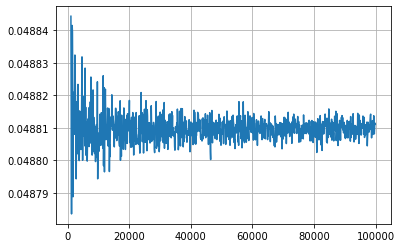

In [44]:
# plot N vs m, to see convergence
N=np.arange(1000,100000,100)

mc=[]
for n in N:
    mc.append(MC_option(n,S,K,r,T,v))
    
import matplotlib.pyplot as plt
plt.plot(N,mc)
plt.grid()
plt.show()

In [82]:
# std of log(S_T/S0) is expected to be sigma sqrt(T)
N=1000
log_s=np.log(MC_stock(N,S0,r,T,v)/S0)
print(log_s.std())

v*np.sqrt(T)


0.020271675574933565


0.02

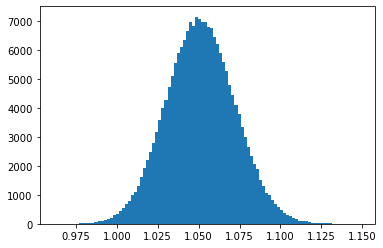

In [70]:
plt.hist(s,bins=100)
plt.show()

#### Effeect of symmetrization used in MC_stock function

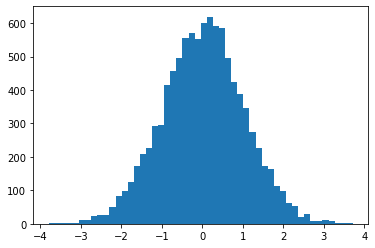

In [56]:
Z=np.random.normal(0,1,10000)
plt.hist(Z,bins=50)
plt.show()

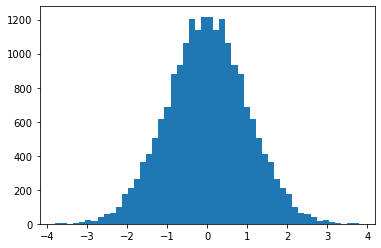

In [57]:
Z=np.append(Z,-Z)
plt.hist(Z,bins=50)
plt.show()